In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('Pensionny_fond_Indii.xlsx')
data = data.dropna()
data_normalized = (data - data.mean()) / data.std()


In [173]:
cov_matrix = np.cov(data_normalized.astype(float).T)
print(cov_matrix)

[[ 1.          0.87257635 -0.99830959  0.9303898 ]
 [ 0.87257635  1.         -0.84768277  0.97313254]
 [-0.99830959 -0.84768277  1.         -0.91215728]
 [ 0.9303898   0.97313254 -0.91215728  1.        ]]


In [175]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print('Собственные значения ', eigenvalues_sorted)
print('Собственные векторы ', eigenvectors_sorted)

Собственные значения  [3.76773290e+00 2.15309335e-01 1.64818182e-02 4.75942972e-04]
Собственные векторы  [[ 0.50463182  0.43128844 -0.11687599  0.73869954]
 [ 0.48993194 -0.64661499 -0.58259853 -0.04934274]
 [-0.49894207 -0.53491503  0.11722115  0.67170077]
 [ 0.50633016 -0.33127821  0.79572493 -0.0265774 ]]


In [177]:
n_components = 2
eigenvectors_selected = eigenvectors_sorted[:, :n_components]


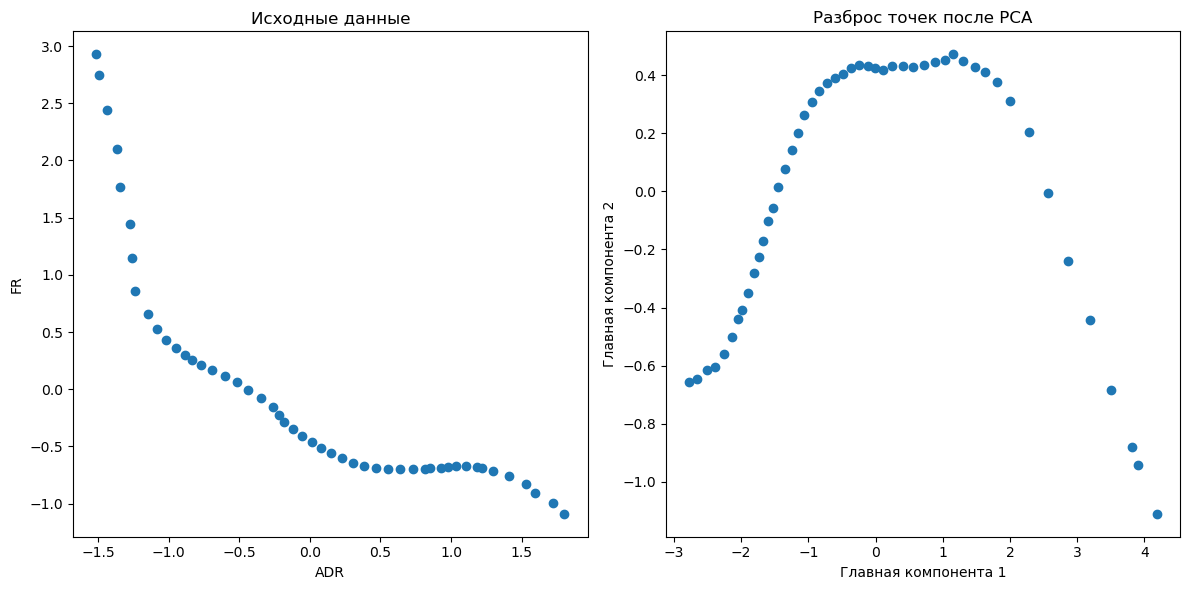

In [179]:
data_reduced = np.dot(data_normalized, eigenvectors_selected)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Исходные данные')
plt.scatter(data_normalized.iloc[:, 2], data_normalized.iloc[:, 1])
plt.xlabel('ADR')
plt.ylabel('FR')
plt.subplot(1, 2, 2)
plt.title('Разброс точек после PCA')
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')

plt.tight_layout()
plt.show()


In [181]:
loadings = eigenvectors_selected * np.sqrt(eigenvalues_sorted[:n_components])
print("Матрица факторных нагрузок:")
print(loadings)


Матрица факторных нагрузок:
[[ 0.97952311  0.20012403]
 [ 0.95098968 -0.30003865]
 [-0.96847894 -0.24820826]
 [ 0.9828197  -0.15371785]]
